In [1]:
import numpy as np
import qiskit as qk
import matplotlib.pyplot as plt
from qiskit import Aer
from tqdm.notebook import tqdm



import sys
sys.path.insert(0, '../../src/')
from neuralnetwork import *
from costfunction import *
from analysis import *

#%matplotlib notebook
%matplotlib inline
%load_ext autoreload
%autoreload 2
np.set_printoptions(precision=3)

# Vanishing Gradient

## QNN

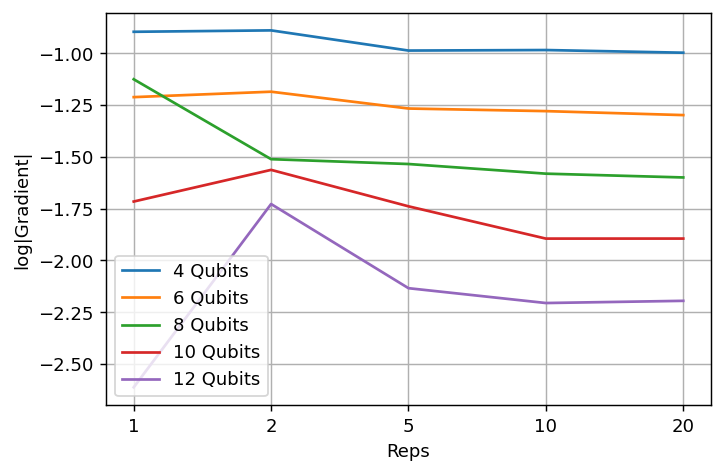

In [2]:
models = loader(data_path("vanishing_grad_QNN"))
grad = [np.mean(np.abs(model.layers[0].weight_partial)) for model in models]
grad = np.array(grad).reshape(5,5)

fig, ax =plt.subplots(figsize=(6,4), dpi=130, facecolor='w', edgecolor='k')
plt.plot([1, 2, 3, 4, 5], np.log10(grad.T))
plt.xticks([1, 2, 3, 4, 5])

labels = ["1", "2", "5", "10", "20"]
ax.set_xticklabels(labels)

plt.xlabel("Reps")
plt.ylabel("log|Gradient|")
plt.legend(["4 Qubits","6 Qubits", "8 Qubits", "10 Qubits", "12 Qubits"])
plt.grid()

fig.savefig(image_path("vanishing_gradient_QNN.pdf"), bbox_inches='tight')

plt.show()

## QCN

### Total Gradient

In [7]:
model1 = loader(data_path("vanishing_grad_width_4_reps_2"))
model2 = loader(data_path("vanishing_grad_width_5_reps_2"))
model3 = loader(data_path("vanishing_grad_width_6_reps_2"))
model4 = loader(data_path("vanishing_grad_width_7_reps_2"))
model5 = loader(data_path("vanishing_grad_width_8_reps_2"))
model6 = loader(data_path("vanishing_grad_dnn"))
model7 = loader(data_path("vanishing_grad_dnn_2"))

In [10]:
gradient_avg = np.zeros((5, len(model2[0].layers)))
input_partial_avg = np.zeros_like(gradient_avg)
weight_partial_avg = np.zeros_like(gradient_avg)
gradient_std = np.zeros_like(gradient_avg)
input_partial_std = np.zeros_like(gradient_avg)
weight_partial_std = np.zeros_like(gradient_avg)


gradient_avg[0, :], input_partial_avg[0,:], weight_partial_avg[0,:], gradient_std[0, :], input_partial_std[0,:], weight_partial_std[0,:] = gradient_analysis(model1)
gradient_avg[1, :], input_partial_avg[1,:], weight_partial_avg[1,:], gradient_std[1, :], input_partial_std[1,:], weight_partial_std[1,:] = gradient_analysis(model2)
gradient_avg[2, :], input_partial_avg[2,:], weight_partial_avg[2,:], gradient_std[2, :], input_partial_std[2,:], weight_partial_std[2,:] = gradient_analysis(model3)
gradient_avg[3, :], input_partial_avg[3,:], weight_partial_avg[3,:], gradient_std[3, :], input_partial_std[3,:], weight_partial_std[3,:] = gradient_analysis(model4)
gradient_avg[4, :], input_partial_avg[4,:], weight_partial_avg[4,:], gradient_std[4, :], input_partial_std[4,:], weight_partial_std[4,:] = gradient_analysis(model5)

input_partial_avg[:,0] = float("NaN")

gradient_avg_dnn = np.zeros(8)

for model in model6:
    for i, grad in enumerate(model.weight_gradient_list):
        gradient_avg_dnn[i] += np.mean(np.abs(grad))

gradient_avg_dnn /= len(model6)

gradient_avg_dnn_2 = np.zeros(8)

for model in model7:
    for i, grad in enumerate(model.weight_gradient_list):
        gradient_avg_dnn_2[i] += np.mean(np.abs(grad))

gradient_avg_dnn_2 /= len(model7)

[0.178 0.146 0.14  0.189 0.175 0.239 0.32  0.414]


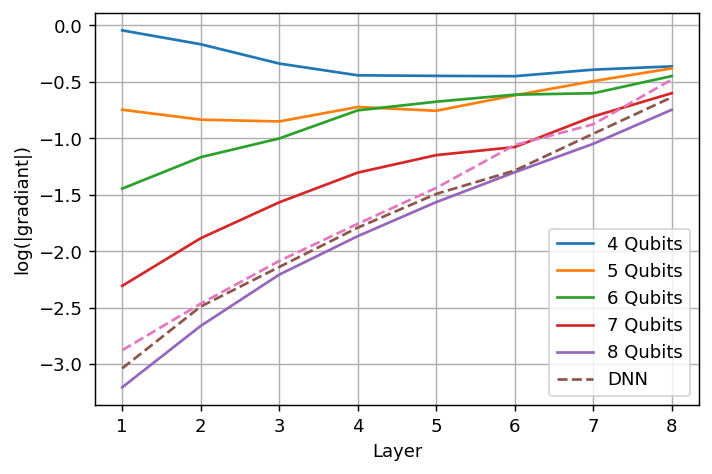

In [11]:
fig=plt.figure(figsize=(6,4), dpi=130, facecolor='w', edgecolor='k')

x_ticks = list(range(1,9))
print(gradient_avg[1])
plt.plot(x_ticks, np.log10(gradient_avg[0]))
plt.plot(x_ticks, np.log10(gradient_avg[1]))
plt.plot(x_ticks, np.log10(gradient_avg[2]))
plt.plot(x_ticks, np.log10(gradient_avg[3]))
plt.plot(x_ticks, np.log10(gradient_avg[4]))
plt.plot(x_ticks, np.log10(gradient_avg_dnn_2), "--")
plt.plot(x_ticks, np.log10(gradient_avg_dnn), "--")

plt.xlabel("Layer")
plt.ylabel("log(|gradiant|)")
plt.legend(["4 Qubits", "5 Qubits", "6 Qubits", "7 Qubits", "8 Qubits", "DNN, 5 nodes", "DNN, 11 nodes"])
plt.grid()

fig.savefig(image_path("vanishing_gradient_total.pdf"), bbox_inches='tight')

plt.show()

### Local Gradients

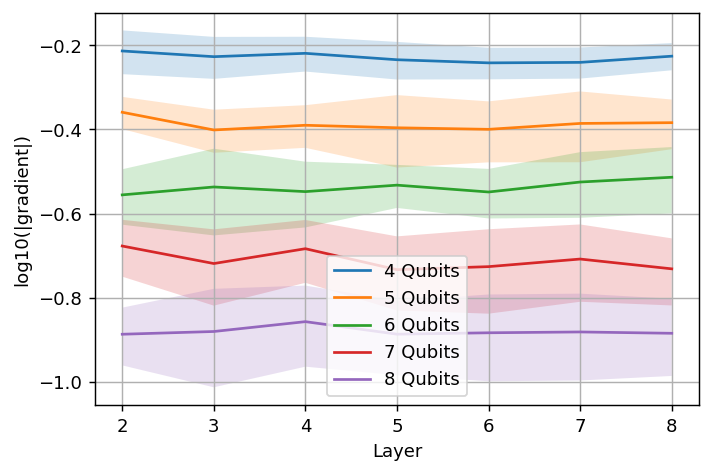

In [6]:
fig=plt.figure(figsize=(6,4), dpi=130, facecolor='w', edgecolor='k')
x_ticks = [1,2,3,4,5,6,7,8]
plt.plot(x_ticks, np.log10(input_partial_avg.T))

for i in range(input_partial_avg.shape[0]):
    fill1 = np.log10(input_partial_avg[i] - input_partial_std[i])
    fill2 = np.log10(input_partial_avg[i] + input_partial_std[i])
    plt.fill_between(x_ticks, fill1, fill2, alpha=0.2)

plt.xlabel("Layer")
plt.ylabel("log10(|gradient|)")
plt.legend(["4 Qubits", "5 Qubits", "6 Qubits", "7 Qubits", "8 Qubits"])
plt.grid()
fig.savefig(image_path("vanishing_gradient_partial_input.pdf"), bbox_inches='tight')
plt.show()

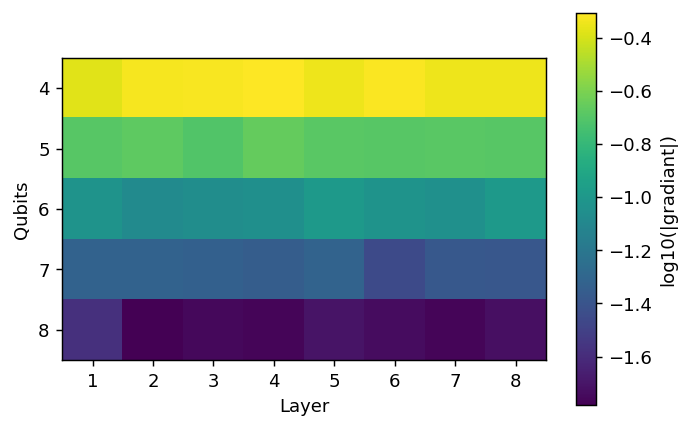

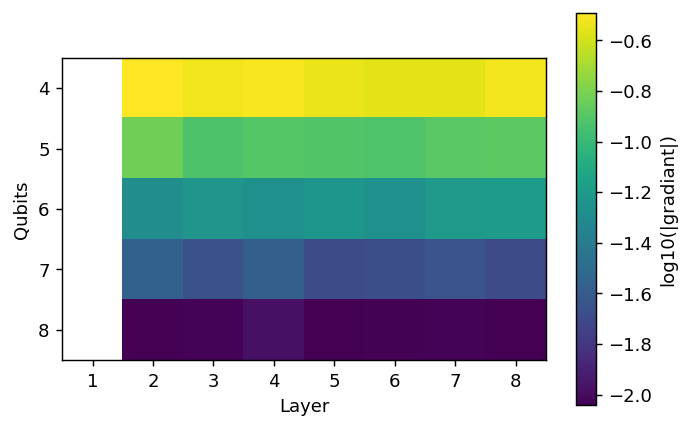

In [12]:
fig=plt.figure(figsize=(6,4), dpi=130, facecolor='w', edgecolor='k')

plt.imshow(np.log(weight_partial_avg), extent=[0.5,8.5,8.5,3.5])
plt.xlabel("Layer")
plt.ylabel("Qubits")
plt.colorbar(label="log10(|gradiant|)")

fig.savefig(image_path("vanishing_gradient_partial_weight.pdf"), bbox_inches='tight')
plt.show()

fig=plt.figure(figsize=(6,4), dpi=130, facecolor='w', edgecolor='k')
plt.imshow(np.log(input_partial_avg), extent=[0.5,8.5,8.5,3.5])
plt.xlabel("Layer")
plt.ylabel("Qubits")
plt.colorbar(label="log10(|gradiant|)")

#fig.savefig(image_path("vanishing_gradient_partial_input.pdf"), bbox_inches='tight')
plt.show()

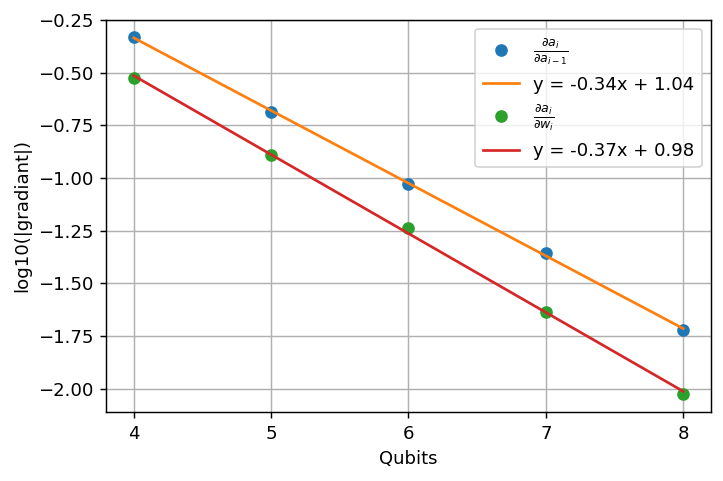

In [13]:
fig=plt.figure(figsize=(6,4), dpi=130, facecolor='w', edgecolor='k')

x = np.arange(4,9)
y1 = np.log(np.mean(weight_partial_avg, axis=1))
y2 = np.log(np.mean(input_partial_avg[:,1:], axis=1))


a1, b1 = np.polyfit(x, y1, 1)
a2, b2 = np.polyfit(x, y2, 1)

plt.plot(x, y1, "o")
plt.plot(x, a1*x + b1)

plt.plot(x, y2, "o")
plt.plot(x, a2*x + b2)

plt.xlabel("Qubits")
plt.ylabel("log10(|gradiant|)")
plt.legend(["$\\frac{\\partial a_{i}}{\\partial a_{i-1}}$", f"y = {a1:.2f}x + {b1:.2f}", "$\\frac{\\partial a_{i}}{\\partial w_{i}}$", f"y = {a2:.2f}x + {b2:.2f}"])
plt.xticks([4, 5, 6, 7, 8])

plt.grid()

fig.savefig(image_path("vanishing_gradient_fit.pdf"), bbox_inches='tight')
plt.show()